## K-Means & Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score

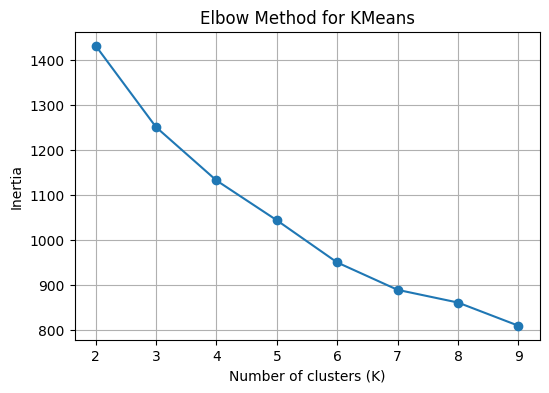

✅ KMeans ARI vs. true labels: 0.2221638208804557


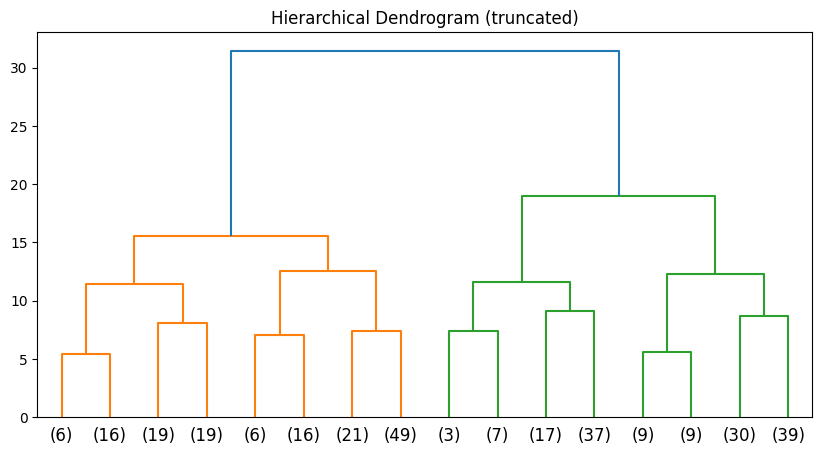

✅ Hierarchical ARI vs. true labels: 0.267559238692131


In [ ]:
# 1. Load data
data = pd.read_csv('../data/selected_features.csv')

# Separate features and target
y = data['target']
X = data.drop(columns=['target'])

# -------------------------------------------------------
# 2. Elbow Method (to find best K for KMeans)
# -------------------------------------------------------
inertias = []
Ks = range(2, 10)

for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(Ks, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.grid(True)
plt.show()

# -------------------------------------------------------
# 3. Apply KMeans with chosen K
# -------------------------------------------------------
k = 3  # <- adjust after looking at elbow plot
km = KMeans(n_clusters=k, n_init=10, random_state=42)
labels_km = km.fit_predict(X)

ari_km = adjusted_rand_score(y, labels_km)
print("✅ KMeans ARI vs. true labels:", ari_km)

# -------------------------------------------------------
# 4. Hierarchical Clustering
# -------------------------------------------------------
Z = linkage(X, method='ward')

plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Hierarchical Dendrogram (truncated)')
plt.show()

hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_hc = hc.fit_predict(X)

ari_hc = adjusted_rand_score(y, labels_hc)
print("✅ Hierarchical ARI vs. true labels:", ari_hc)